In [4]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 9.0MB/s 
     |████████████████████████████████| 51kB 8.0MB/s 
     |████████████████████████████████| 1.0MB 23.8MB/s 
     |████████████████████████████████| 51kB 6.0MB/s 
     |████████████████████████████████| 194kB 47.8MB/s 
     |████████████████████████████████| 51kB 8.3MB/s 
     |████████████████████████████████| 40kB 6.3MB/s 
     |████████████████████████████████| 92kB 12.6MB/s 
     |████████████████████████████████| 61kB 9.6MB/s 
     |████████████████████████████████| 51kB 9.1MB/s 
     |████████████████████████████████| 2.6MB 50.9MB/s 
Mounted at /content/gdrive


In [5]:
#hide
from fastbook import *

In [6]:
1+1

2

[[chapter_intro]]

In [7]:
#id first_training
#caption Results from the first training
# CLICK ME
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.169111,0.019686,0.006766,00:45


epoch,train_loss,valid_loss,error_rate,time
0,0.052681,0.018853,0.006766,00:48


In [9]:
1+1

2

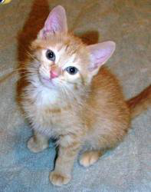

In [10]:
img = PILImage.create(image_cat())
img.to_thumb(192)

In [12]:
#hide_output
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [13]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 1.000000


We just covered a lot of information so let's recap briefly, <<dljargon>> provides a handy vocabulary.

```asciidoc
[[dljargon]]
.Deep learning vocabulary
[options="header"]
|=====
| Term | Meaning
|Label | The data that we're trying to predict, such as "dog" or "cat"
|Architecture | The _template_ of the model that we're trying to fit; the actual mathematical function that we're passing the input data and parameters to
|Model | The combination of the architecture with a particular set of parameters
|Parameters | The values in the model that change what task it can do, and are updated through model training
|Fit | Update the parameters of the model such that the predictions of the model using the input data match the target labels
|Train | A synonym for _fit_
|Pretrained model | A model that has already been trained, generally using a large dataset, and will be fine-tuned
|Fine-tune | Update a pretrained model for a different task
|Epoch | One complete pass through the input data
|Loss | A measure of how good the model is, chosen to drive training via SGD
|Metric | A measurement of how good the model is, using the validation set, chosen for human consumption
|Validation set | A set of data held out from training, used only for measuring how good the model is
|Training set | The data used for fitting the model; does not include any data from the validation set
|Overfitting | Training a model in such a way that it _remembers_ specific features of the input data, rather than generalizing well to data not seen during training
|CNN | Convolutional neural network; a type of neural network that works particularly well for computer vision tasks
|=====
```

In [14]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,2.839995,2.661024,00:01


epoch,train_loss,valid_loss,time
0,1.897283,1.525533,00:01
1,1.619502,1.733680,00:01
2,1.463601,1.065222,00:01
3,1.305765,0.987001,00:01
4,1.162038,0.878437,00:01
5,1.045567,0.852440,00:01
6,0.951036,0.822128,00:01
7,0.877603,0.811560,00:01


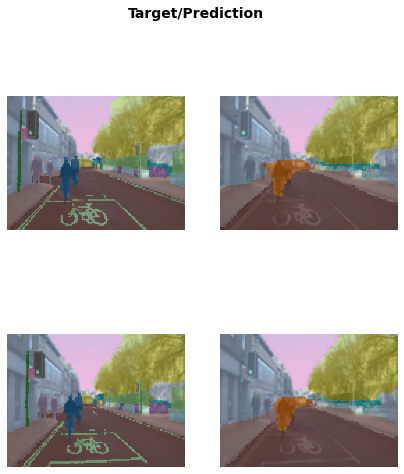

In [15]:
learn.show_results(max_n=6, figsize=(7,8))

In [16]:
from fastai.text.all import *
 
dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test', bs=16)
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.622369,0.425535,0.804200,06:58


epoch,train_loss,valid_loss,accuracy,time
0,0.318581,0.257573,0.895440,10:55
1,0.268889,0.200939,0.925280,10:56
2,0.188737,0.185267,0.929680,10:55
3,0.157500,0.178415,0.932640,10:56


In [17]:
learn.predict("I really liked that movie!")

('pos', tensor(1), tensor([0.0496, 0.9504]))

In [18]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)

In [19]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.358804,0.357531,0.832770,00:05
1,0.354408,0.345922,0.839066,00:05
2,0.341336,0.341421,0.845516,00:05


In [20]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.502626,1.436104,00:00


epoch,train_loss,valid_loss,time
0,1.354461,1.375152,00:00
1,1.248513,1.186878,00:00
2,1.005707,0.874296,00:00
3,0.795088,0.737238,00:00
4,0.682730,0.704470,00:00
5,0.642642,0.695310,00:00
6,0.620968,0.690554,00:00
7,0.615781,0.689420,00:00
8,0.602483,0.688677,00:00
9,0.611634,0.688576,00:00


In [21]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,19.0,26.0,4.5,4.054209
1,8.0,90.0,3.0,4.375954
2,81.0,2.0,3.5,3.326896
3,48.0,25.0,2.0,3.777259
4,83.0,67.0,4.0,3.927464
5,33.0,97.0,4.0,3.907926
6,27.0,9.0,4.0,3.546902
7,45.0,38.0,2.0,3.315236
8,38.0,7.0,5.0,4.670257
